In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import os
import time

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid', {'axes.edgecolor': '.2'})
sns.set_context('notebook', font_scale=1.4)

from fairlearn.datasets import fetch_acs_income

# Get Data

In [4]:
# output = fetch_acs_income(cache=True, data_home=None,
#                           as_frame=True, return_X_y=True,
#                           states=None,  # fetch all states
#                          )
# X, y = output
# X['PINCP'] = y
# X

In [5]:
# X.to_csv('ACSIncome.csv', index=False)

In [6]:
df = pd.read_csv('ACSIncome.csv')
df.SEX.replace(1, 'Male', inplace=True)
df.SEX.replace(2, 'Female', inplace=True)
df

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,PINCP
0,18.0,1.0,18.0,5.0,4720.0,13.0,17.0,21.0,Female,2.0,1600.0
1,53.0,5.0,17.0,5.0,3605.0,18.0,16.0,40.0,Male,1.0,10000.0
2,41.0,1.0,16.0,5.0,7330.0,1.0,17.0,40.0,Male,1.0,24000.0
3,18.0,6.0,18.0,5.0,2722.0,1.0,17.0,2.0,Female,1.0,180.0
4,21.0,5.0,19.0,5.0,3870.0,12.0,17.0,50.0,Male,1.0,29000.0
...,...,...,...,...,...,...,...,...,...,...,...
1664495,39.0,6.0,16.0,5.0,6260.0,72.0,0.0,20.0,Male,1.0,9600.0
1664496,38.0,6.0,14.0,5.0,4251.0,72.0,0.0,32.0,Male,8.0,2400.0
1664497,37.0,1.0,19.0,3.0,7750.0,17.0,13.0,40.0,Female,9.0,19700.0
1664498,47.0,1.0,16.0,1.0,8990.0,72.0,1.0,40.0,Male,8.0,18700.0


Define helper function

In [7]:
def print_stats(df_male, df_female, col):
    print('\tMale\t\t Females')
    print(f"Min:\t{df_male.loc['min', col]}\t\t {df_female.loc['min', col]}")
    print(f"25%:\t{df_male.loc['25%', col]}\t\t {df_female.loc['25%', col]}")
    print(f"50%:\t{df_male.loc['50%', col]}\t\t {df_female.loc['50%', col]}")
    print(f"Mean:\t{df_male.loc['mean', col]:.1f}\t\t {df_female.loc['mean', col]:.1f}")
    print(f"75%:\t{df_male.loc['75%', col]}\t\t {df_female.loc['75%', col]}")
    print(f"Max:\t{df_male.loc['max', col]:.1f}\t\t {df_female.loc['max', col]:.1f}")

##  Summary info by sex across all occupations

#### Females

In [8]:
df_female_describe = df[df.SEX == 'Female'].describe()
df_female_describe

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,RAC1P,PINCP
count,797765.000000,797765.000000,797765.000000,797765.000000,797765.000000,797765.000000,797765.000000,797765.000000,797765.000000,7.977650e+05
mean,43.240103,2.023250,18.880278,2.551489,3759.551819,64.151672,2.135080,35.669844,1.882503,4.460528e+04
std,15.232377,1.686244,3.123600,1.768810,2171.136823,91.218866,4.233478,12.635704,2.076320,5.340684e+04
min,17.000000,1.000000,1.000000,1.000000,10.000000,1.000000,0.000000,1.000000,1.000000,1.100000e+02
25%,30.000000,1.000000,16.000000,1.000000,2310.000000,18.000000,0.000000,30.000000,1.000000,1.530000e+04
50%,43.000000,1.000000,19.000000,1.000000,4000.000000,36.000000,1.000000,40.000000,1.000000,3.200000e+04
75%,56.000000,3.000000,21.000000,5.000000,5000.000000,48.000000,1.000000,40.000000,1.000000,5.600000e+04
max,96.000000,8.000000,24.000000,5.000000,9830.000000,554.000000,17.000000,99.000000,9.000000,1.376000e+06


#### Males

In [9]:
df_male_describe = df[df.SEX == 'Male'].describe()
df_male_describe

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,RAC1P,PINCP
count,866735.000000,866735.000000,866735.000000,866735.000000,866735.000000,866735.000000,866735.000000,866735.000000,866735.000000,8.667350e+05
mean,43.568819,2.127432,18.376866,2.494851,4567.983552,67.349972,2.338979,40.785956,1.867604,6.776289e+04
std,15.364194,1.943254,3.432778,1.821610,2987.154967,94.701807,4.518311,13.003634,2.091754,8.585176e+04
min,17.000000,1.000000,1.000000,1.000000,10.000000,1.000000,0.000000,1.000000,1.000000,1.040000e+02
25%,31.000000,1.000000,16.000000,1.000000,1980.000000,18.000000,0.000000,40.000000,1.000000,2.400000e+04
50%,43.000000,1.000000,19.000000,1.000000,4700.000000,36.000000,0.000000,40.000000,1.000000,4.500000e+04
75%,56.000000,3.000000,21.000000,5.000000,7000.000000,48.000000,2.000000,47.000000,1.000000,8.000000e+04
max,96.000000,8.000000,24.000000,5.000000,9830.000000,554.000000,17.000000,99.000000,9.000000,1.423000e+06


### Counts

In [10]:
num_male = int(df_male_describe.loc['count'][0])
num_female = int(df_female_describe.loc['count'][0])
total = num_male + num_female
print(f'There are {num_male:,} males ({num_male/total*100:.1f}%) and {num_female:,} females ({num_female/total*100:.1f}%)')

There are 866,735 males (52.1%) and 797,765 females (47.9%)


### Age Distribution
Age distribution is very similar between males and females. Min, max, mean, and median are identical between these 2 groups

In [11]:
print_stats(df_male_describe, df_female_describe, 'AGEP')

	Male		 Females
Min:	17.0		 17.0
25%:	31.0		 30.0
50%:	43.0		 43.0
Mean:	43.6		 43.2
75%:	56.0		 56.0
Max:	96.0		 96.0


Text(0.5, 1.0, 'Age Distribution is Similar')

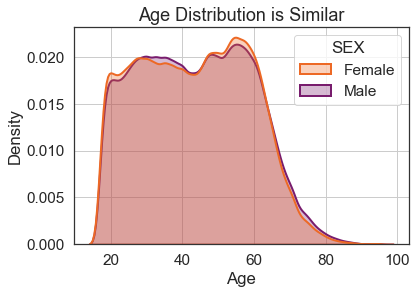

In [12]:
ax = sns.kdeplot(data=df,
                 x='AGEP',
                 hue='SEX',
                 shade=True,
                 common_norm=False,
                 palette='inferno_r',
                 linewidth=2,
                 alpha=0.3,
                );
ax.set_xlabel('Age')
ax.set_title('Age Distribution is Similar', fontsize=18)

### Hours Worked per Week
Accross all occupations, on average, males worked 14% more hours than females. 

In [13]:
male_hrs = df_male_describe.loc['mean']['WKHP']
female_hrs = df_female_describe.loc['mean']['WKHP']
print(f'Across all occupations, males worked {(male_hrs/female_hrs-1)*100:.1f}% more hours than females (using mean)')

Across all occupations, males worked 14.3% more hours than females (using mean)


In [14]:
print_stats(df_male_describe, df_female_describe, 'WKHP')

	Male		 Females
Min:	1.0		 1.0
25%:	40.0		 30.0
50%:	40.0		 40.0
Mean:	40.8		 35.7
75%:	47.0		 40.0
Max:	99.0		 99.0


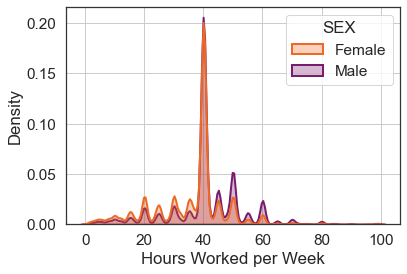

In [15]:
ax = sns.kdeplot(data=df,
                 x='WKHP',
                 hue='SEX',
                 shade=True,
                 common_norm=False,
                 palette='inferno_r',
                 linewidth=2,
                 alpha=0.3,
                );
ax.set_xlabel('Hours Worked per Week');

### Hold Occupation Constant

In [16]:
values, counts = np.unique(df.OCCP.values, return_counts=True)
occupations = {int(v): c for v,c in zip(values, counts)}
for v, c in occupations.items():
    if c > 40000:
        print(int(v), c)

440 42946
2310 44763


In [17]:
occupations_rev = {v:k for k, v in occupations.items()}
keys = list(occupations_rev.keys())
keys.sort(reverse=True)
print('OCCP code\t count')
for key in keys[:10]:
    print(f'{occupations_rev[key]}\t\t {key}')

OCCP code	 count
2310		 44763
440		 42946
9130		 38262
4720		 35495
4760		 35331
3255		 34974
5740		 31525
5240		 31118
4700		 31097
4220		 28484


The most popular occupation codes are
- 2310: EDU-Elementary And Middle School Teachers
- 440: MGR-Other Managers
- 9130: TRN-Driver/Sales Workers And Truck Drivers
- 4720: SAL-Cashiers
- 4760: SAL-Retail Salespersons
- 3255: MED-Registered Nurses
- 5740: OFF-Secretaries And Administrative Assistants, Except Legal, Medial, And Executive
- 5240: OFF-Customer Service Representatives
- 4700: SAL-First-Line Supervisors Of Retail Sales Workers
- 4220: CLN-Janitors And Building Cleaners

Use US Census data dictionary to find the codes: https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2018.pdf

#### Examine 2310: Teachers

In [18]:
OCCP_ID = 2310

#### Males

In [19]:
df_male_teacher_describe = df[(df.SEX == 'Male') & (df.OCCP == OCCP_ID)].describe()
df_male_teacher_describe

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,RAC1P,PINCP
count,9401.000000,9401.000000,9401.000000,9401.000000,9401.0,9401.000000,9401.000000,9401.000000,9401.000000,9401.000000
mean,45.285927,2.909690,21.516966,2.019253,2310.0,48.081268,1.272737,40.756409,1.519732,58444.485693
std,13.528337,1.023465,0.845485,1.649678,0.0,71.059466,3.138347,11.781712,1.659357,34651.241164
min,18.000000,1.000000,15.000000,1.000000,2310.0,1.000000,0.000000,1.000000,1.000000,150.000000
25%,34.000000,2.000000,21.000000,1.000000,2310.0,17.000000,0.000000,40.000000,1.000000,40000.000000
50%,44.000000,3.000000,22.000000,1.000000,2310.0,35.000000,0.000000,40.000000,1.000000,55000.000000
75%,55.000000,4.000000,22.000000,3.000000,2310.0,45.000000,1.000000,46.000000,1.000000,72000.000000
max,90.000000,8.000000,24.000000,5.000000,2310.0,554.000000,17.000000,99.000000,9.000000,543000.000000


#### Females

In [20]:
df_female_teacher_describe = df[(df.SEX == 'Female') & (df.OCCP == OCCP_ID)].describe()
df_female_teacher_describe

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,RAC1P,PINCP
count,35362.000000,35362.000000,35362.000000,35362.000000,35362.0,35362.000000,35362.000000,35362.000000,35362.000000,35362.000000
mean,44.640009,2.839065,21.444093,1.953340,2310.0,47.384367,1.121741,39.109666,1.480092,49585.330015
std,12.926986,1.022375,0.836343,1.551698,0.0,68.533105,2.665590,11.914746,1.593184,31603.459695
min,17.000000,1.000000,18.000000,1.000000,2310.0,1.000000,0.000000,1.000000,1.000000,110.000000
25%,34.000000,2.000000,21.000000,1.000000,2310.0,17.000000,0.000000,38.000000,1.000000,32000.000000
50%,44.000000,3.000000,22.000000,1.000000,2310.0,34.000000,0.000000,40.000000,1.000000,48000.000000
75%,54.000000,3.000000,22.000000,3.000000,2310.0,46.000000,1.000000,45.000000,1.000000,63000.000000
max,95.000000,8.000000,24.000000,5.000000,2310.0,554.000000,17.000000,99.000000,9.000000,660000.000000


#### Counts

In [21]:
num_male = int(df_male_teacher_describe.loc['count'][0])
num_female = int(df_female_teacher_describe.loc['count'][0])
total = num_male + num_female
print(f'There are {num_male:,} males ({num_male/total*100:.1f}%) and '
      f'{num_female:,} females ({num_female/total*100:.1f}%)')

There are 9,401 males (21.0%) and 35,362 females (79.0%)


#### Age Distribution
- Quantitatively, min, max, mean, median, 25th percentile, and 75th percentile and nearly identical

In [22]:
print_stats(df_male_teacher_describe, df_female_teacher_describe, 'AGEP')

	Male		 Females
Min:	18.0		 17.0
25%:	34.0		 34.0
50%:	44.0		 44.0
Mean:	45.3		 44.6
75%:	55.0		 54.0
Max:	90.0		 95.0


Text(0.5, 1.0, 'Age Distribution is Similar')

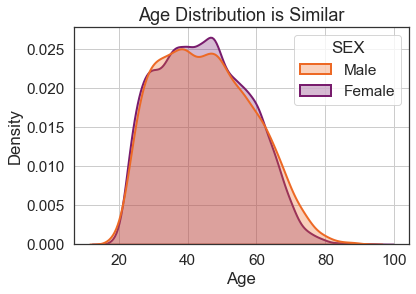

In [23]:
ax = sns.kdeplot(data=df.query(f'OCCP == {OCCP_ID}'),
                 x='AGEP',
                 hue='SEX',
                 shade=True,
                 common_norm=False,
                 palette='inferno_r',
                 linewidth=2,
                 alpha=0.3,
                );
ax.set_xlabel('Age')
ax.set_title('Age Distribution is Similar', fontsize=18)

#### Hours Worked per Week
For elementary and middle school teachers, on average, males worked 4.2% more hours than females. 

In [24]:
male_hrs = df_male_teacher_describe.loc['mean']['WKHP']
female_hrs = df_female_teacher_describe.loc['mean']['WKHP']
print(f'Males worked {(male_hrs/female_hrs-1)*100:.1f}% more hours than females (using mean)')

Males worked 4.2% more hours than females (using mean)


In [25]:
print_stats(df_male_teacher_describe, df_female_teacher_describe, 'WKHP')

	Male		 Females
Min:	1.0		 1.0
25%:	40.0		 38.0
50%:	40.0		 40.0
Mean:	40.8		 39.1
75%:	46.0		 45.0
Max:	99.0		 99.0


Text(0.5, 1.0, 'Hours Worked is Similar')

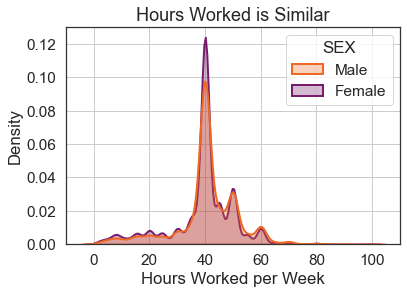

In [26]:
ax = sns.kdeplot(data=df.query(f'OCCP == {OCCP_ID}'),
                 x='WKHP',
                 hue='SEX',
                 shade=True,
                 common_norm=False,
                 palette='inferno_r',
                 linewidth=2,
                 alpha=0.3,
                );
ax.set_xlabel('Hours Worked per Week');
ax.set_title('Hours Worked is Similar', fontsize=18)

#### Education
- the education levels are very similar between these two groups.

Use US Census data dictionary to find the codes: https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2018.pdf

Codes are sorted so that lower numbers correspond to lower education levels and higher numbers correspond to higher education levels. For example: 
- 20: Associate's degree
- 21: Bachelors degree
- 22: Master's degree
- 23: Professional degree beyon a Bachelor's degree
- 24: Doctorate degree

In [27]:
print_stats(df_male_teacher_describe, df_female_teacher_describe, 'SCHL')

	Male		 Females
Min:	15.0		 18.0
25%:	21.0		 21.0
50%:	22.0		 22.0
Mean:	21.5		 21.4
75%:	22.0		 22.0
Max:	24.0		 24.0


Text(0.5, 1.0, 'Education Level is Similar')

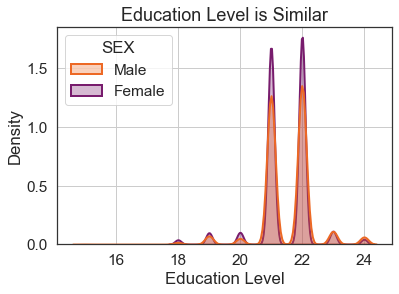

In [28]:
ax = sns.kdeplot(data=df.query(f'OCCP == {OCCP_ID}'),
                 x='SCHL',
                 hue='SEX',
                 shade=True,
                 common_norm=False,
                 palette='inferno_r',
                 linewidth=2,
                 alpha=0.3,
                 legend=True,
                );
ax.set_xlabel('Education Level');
sns.move_legend(ax, "upper left")
ax.set_title('Education Level is Similar', fontsize=18)

#### Salary 

In [29]:
print_stats(df_male_teacher_describe, df_female_teacher_describe, 'PINCP')

	Male		 Females
Min:	150.0		 110.0
25%:	40000.0		 32000.0
50%:	55000.0		 48000.0
Mean:	58444.5		 49585.3
75%:	72000.0		 63000.0
Max:	543000.0		 660000.0


In [30]:
male_income = df_male_teacher_describe.loc['mean']['PINCP']
female_income = df_female_teacher_describe.loc['mean']['PINCP']
print(f'When holding occupation constant (teachers) '
      f'Males earned {(male_income/female_income-1)*100:.1f}% more than females (using mean)')

When holding occupation constant (teachers) Males earned 17.9% more than females (using mean)


In [31]:
male_income = df_male_teacher_describe.loc['50%']['PINCP']
female_income = df_female_teacher_describe.loc['50%']['PINCP']
print(f'When holding occupation constant (teachers) '
      f'Males earned {(male_income/female_income-1)*100:.1f}% more than females (using median)')

When holding occupation constant (teachers) Males earned 14.6% more than females (using median)


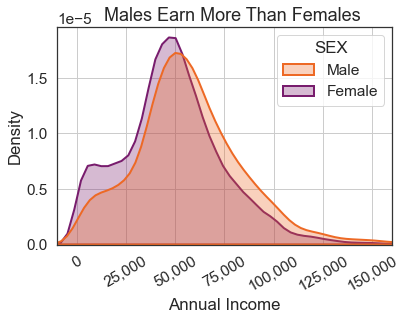

In [32]:
sns.set_style('whitegrid', {'axes.edgecolor': '.2'}) # {"grid.color": "0.2"})
sns.set_context('notebook', font_scale=1.4)
ax = sns.kdeplot(data=df[df.OCCP == OCCP_ID],
                 x='PINCP',
                 hue='SEX',
                 shade=True,
                 common_norm=False,
                 palette='inferno_r',
                 linewidth=2,
                 alpha=0.3,
                );
ax.set_xlim([-1e4, 1.6e5])
ax.set_xlabel('Annual Income')
ax.set_title('   Males earn more than females'.title(), fontsize=18)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'));
plt.xticks(rotation=30);